# Prey predator model:

* The prey-predator model is one of the simplest ways to model the evolution of a one-prey, one-predator ecosystem over time. 
* If $x(t)$ represents the prey population and $y(t)$ represents the predator population, then they are governed by the following system of simultaneous first order D.Es :     
$$\frac{dx}{dt} = rx - axy,$$
$$\frac{dy}{dt} = -my + bxy,$$
for some constants $a$, $b$, $r$ and $m$. 
* We will try to numerically solve for this system under the conditions $r = m = 1$, $a = 0.3$ and $b = 0.2$, and $x(0) = y(0) = 1$ and plot the graphs of $x(t)$, $y(t)$ w.r.t $t$ as well as the phase space, $y(t)$ vs $x(t)$. 


#Solution curves:
* We can solve for $x(t)$ and $y(t)$ numerically. 
* Here, we shall solve it via the Runge-Kutta fourth order method (RK-4). Our domain of consideration is $t  \in [0, 20]$.
*Let us say we know $x(t_n)$ and $y(t_n)$, and we wish to evaluate $x(t_{n+1})$ and $y(t_{n+1})$, where $t_{n+1} - t_n = \Delta t$, the step size.
* In general, for the simultaneous system of differential equations, 
$$\frac{dx}{dt} = f(t, x, y)$$
and $$\frac{dy}{dt} = g(t, x, y),$$ the RK-4 method proceeds as follows:


1) Let : 
 $$K_1 = \Delta t \cdot f(t_n, x_n, y_n)$$
 $$L_1 = \Delta t \cdot g(t_n, x_n, y_n)$$
$$K_2 = \Delta t \cdot f \left( t_n + \frac{\Delta t}{2}, x_n + \frac{K_1}{2}, y_n + \frac{L_1}{2} \right)$$
$$L_2 = \Delta t \cdot g \left( t_n + \frac{\Delta t}{2}, x_n + \frac{K_1}{2}, y_n + \frac{L_1}{2} \right)$$
$$K_3 = \Delta t \cdot f \left( t_n + \frac{\Delta t}{2}, x_n + \frac{K_2}{2}, y_n + \frac{L_2}{2} \right)$$
$$L_3 = \Delta t \cdot g \left( t_n + \frac{\Delta t}{2}, x_n + \frac{K_2}{2}, y_n + \frac{L_2}{2} \right)$$
and
$$K_4 = \Delta t \cdot f \left(t_n + \Delta t, x_n + K_3, y_n + L3 \right)$$
$$L_4 = \Delta t \cdot g \left(t_n + \Delta t, x_n + K_3, y_n + L_3 \right)$$


2) Then :      
$$x_{n+1} = x_n + \frac{K_1 + 2K_2 + 2K_3 + K_4}{6}$$

and

$$y_{n+1} = y_n + \frac{L_1 + 2L_2 + 2L_3 + L_4}{6}$$

## Error and step size $\Delta t :$
* The RK-4 is a fourth order method, i.e the error that occurs in one iteration is proportional to $(\Delta t)^5$. This can be proven via Taylor Series.
* If the local truncation error is proportional to $(\Delta t)^5$, then the overall/global truncation error is proportional to $(\Delta t)^4$. 
* So, even a reasonable step size like $\Delta t = 0.1$ would only give us an error of the order of $10^{-4}$, which means our answer would be correct upto 3 decimal places. That is a pretty good deal!

For more information regarding the Runge-Kutta method, refer to:
* [Wikipedia page on Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) 
* [Youtube video on Runge-Kutta method for systems of O.D.E's and higher order D.E's (Professor Jeffrey Chasnov, Hong Kong Institute of Science and Technology)](https://youtu.be/wu1sS1g5ivs)

Below is a python program plotting the graphs of $x(t)$ and $y(t)$ versus time, for the given initial conditions. These initial conditions can also be varied.

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from enum import Enum

class PlotType(Enum):
    TIME_SERIES = 1
    PHASE = 2

def runge_kutta_fourth(r, m, a, b, x_0, y_0, plot_type = PlotType.TIME_SERIES):
  """
  This function solves the differential equations dx/dt = r*x - a*x*y, 
  dy/dt = b*x*y - m*y via the Runge-Kutta fourth order method.
  x_0 is the initial value of x.
  y_0 is the initial value of y.
  plot_type specifies the kind of plot needed.
  """

  point_list = [(x_0, y_0)]
  for i in range(1, 201):
    K_1 = (0.1) * (r * point_list[i-1][0] - a * point_list[i-1][0] * point_list[i-1][1])
    L_1 = (0.1) * (b * point_list[i-1][0] * point_list[i-1][1] - m * point_list[i-1][1])
    x_mid = point_list[i-1][0] + (K_1/2)
    y_mid = point_list[i-1][1] + (L_1/2)
    K_2 = (0.1) * (r * x_mid - a * x_mid * y_mid)
    L_2 = (0.1) * (b * x_mid * y_mid - m * y_mid)
    new_x_mid = point_list[i-1][0] + (K_2/2)
    new_y_mid = point_list[i-1][1] + (L_2/2)
    K_3 = (0.1) * (r * new_x_mid - a * new_x_mid * new_y_mid)
    L_3 = (0.1) * (b * new_x_mid * new_y_mid - m * new_y_mid)
    x_end = point_list[i-1][0] + K_3
    y_end = point_list[i-1][1] + L_3
    K_4 = (0.1) * (r * x_end - a * x_end * y_end)
    L_4 = (0.1) * (b * x_end * y_end - m * y_end)
    x = point_list[i-1][0] + (1/6) * (K_1 + 2 * K_2 + 2 * K_3 + K_4)
    y = point_list[i-1][1] + (1/6) * (L_1 + 2 * L_2 + 2 * L_3 + L_4)
    point_list.append((x, y))

  x_coordinates = [x_0]
  y_coordinates = [y_0]

  for i in range(1, 201):
    x_coordinates.append(point_list[i][0])
  for j in range(1, 201):
    y_coordinates.append(point_list[j][1])

  x = np.array(x_coordinates)
  y = np.array(y_coordinates)
  if plot_type == PlotType.TIME_SERIES:
    t = np.array([0.1*i for i in range(0, 201)])
    t_new = np.linspace(t.min(), t.max(), 500)

    rbf = Rbf(t, x, function = 'thin_plate', smooth = 0.001)
    x_smooth = rbf(t_new)
    plt.plot(t_new, x_smooth)
    plt.scatter (t, x);  

    rbf = Rbf(t, y, function = 'thin_plate', smooth = 0.001)
    y_smooth = rbf(t_new)
    plt.plot(t_new, y_smooth)
    plt.scatter (t, y); 

  else: # plot_type == PlotType.PHASE
    x = np.array(x_coordinates)
    y = np.array(y_coordinates)
    plt.plot(x, y)

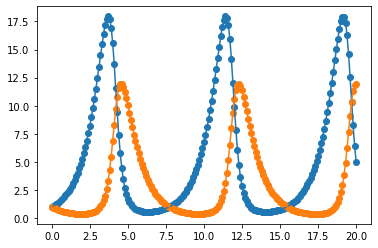

In [41]:
runge_kutta_fourth(1, 1, 0.3, 0.2, 1, 1)

# Phase plot:

* Dividing the first differential equation from the second and applying chain rule, we have:   
$$\frac{dy}{dx} = \frac{-my + bxy}{rx - axy}$$.
* After separating the variables, we get:    
$$\frac{r - ay}{y}\cdot dy = \frac{bx - m}{x}\cdot dx$$.
* Integrating both sides, 
$$r\ln (y) - ay = bx - m\ln (x) + C,$$
where $C$ is a constant of integration, characterised by the initial conditions.
*Substituting the initial conditions, we get $C = 0.5$, and our equation is:
$$0.3x + 0.2y + 0.5 = ln(xy).$$

##Equillibrium points:
* The points $(x, y)$ such that the two populations do not change are called as equillibrium points. 
* Equating both $\frac{dx}{dt}$ and $\frac{dy}{dt}$ to zero, we get two equillibrium points:
$(x, y) = (0, 0)$ (which corresponds to complete extinction of both the species), and $(x, y)$ = ($\frac{m}{b}$, $\frac{r}{a}$).
* It turns out that the origin is a point of instability for the phase-trajectory of the system, and hence the system is not attracted towards the origin. This means that the extinction of both species is difficult in this model and can only occur when somehow all the prey vanish. So, even very low populations can somehow recover!
* The other point is also of interest. Its a point characteristic to the system parameters, and all the phase space trajectories are closed orbits around this point. Orbits near this point are **centered** at this point and are ellipses.

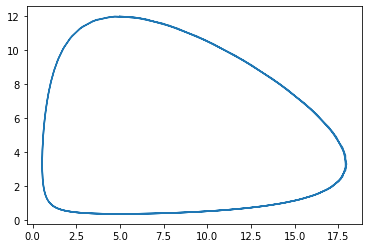

In [42]:
runge_kutta_fourth(1, 1, 0.3, 0.2, 1, 1, 2)